# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [6]:

import os
import re
import emoji
import pandas as pd
import numpy as np
import nltk



from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

nltk.download('stopwords')
sw = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mauricioespinoza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Add any additional import statements you need here




In [8]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/mauricioespinoza/Documents/MADS/ADS509 - Applied Text Mining/module2/M1 Results"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [53]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    """
    # Calculate statistics
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens > 0 else 0.0
    num_characters = sum(len(token) for token in tokens)
    
    if verbose:        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        token_counts = Counter(tokens)
        most_common = token_counts.most_common(num_tokens)
        print(f"The {num_tokens} most common tokens:")
        for token, count in most_common:
            print(f"  {token}: {count}")
    
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [54]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The 13 most common tokens:
  text: 3
  here: 2
  example: 2
  is: 1
  some: 1
  with: 1
  other: 1
  in: 1
  this: 1


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertions are a lightweight way to verify assumptions, catch bugs early, and write more reliable and readable code, especially during development and testing.They act like checkpoints in your code that allow you to pinpoint where things are doing wrong or not wrong 

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [69]:
# Define collapse_whitespace before using it
collapse_whitespace = re.compile(r'\s+')

def clean_text(text):
    """Clean text by removing punctuation, converting to lowercase, and removing stopwords"""
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in punctuation])
    
    # Split on whitespace
    tokens = collapse_whitespace.split(text)
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in sw]
    
    return tokens

In [70]:
punctuation = set(punctuation)  # speeds up comparison

def clean_text(text):
    """Clean text by removing punctuation, converting to lowercase, and removing stopwords"""
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in punctuation])
    
    # Split on whitespace
    tokens = collapse_whitespace.split(text)
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in sw]
    
    return tokens

In [71]:
# Read in the lyrics data
import os


lyrics_path = "/Users/mauricioespinoza/Documents/MADS/ADS509 - Applied Text Mining/module2/M1 Results/lyrics"
lyrics_dict = {}

for artist in os.listdir(lyrics_path):
    artist_path = os.path.join(lyrics_path, artist)
    
    if not os.path.isdir(artist_path):
        continue

    lyrics_dict[artist] = {}

    for song_file in os.listdir(artist_path):
        if song_file.endswith(".txt"):
            song_path = os.path.join(artist_path, song_file)
            with open(song_path, "r", encoding="utf-8") as f:
                lyrics = f.read()
            
            # Remove '.txt' extension
            base_name = os.path.splitext(song_file)[0]

            # Remove artist prefix from filename, e.g. "cher_whenyouwalkaway" → "whenyouwalkaway"
            if base_name.lower().startswith(artist.lower() + "_"):
                song_title = base_name[len(artist) + 1:]
            else:
                song_title = base_name

            lyrics_dict[artist][song_title] = lyrics

# Clean the lyrics data
clean_lyrics_data = {}

for artist, songs in lyrics_dict.items():
    clean_lyrics_data[artist] = {}
    for song, lyrics in songs.items():
        clean_lyrics_data[artist][song] = clean_text(lyrics)




In [72]:
# Print a sample to verify
for artist in lyrics_dict:
    for song in lyrics_dict[artist]:
        print(f"\nArtist: {artist}, Song: {song}")
        print(f"Lyrics Preview:\n{lyrics_dict[artist][song][:300]}...\n")
        break  # Only show one song per artist for preview



Artist: robyn, Song: includemeout
Lyrics Preview:
"Include Me Out"



It is really very simple
Just a single pulse, repeated at a regular interval

Mmm, hmm
Don't include me out, no
Don't include me out

One time for the records and the hits
Two for your money-maker, shake, boom
Three times for the lucky and the dead

One time for the sorry and saf...


Artist: cher, Song: comeandstaywithme
Lyrics Preview:
"Come And Stay With Me"



I'll send away all my false pride
And I'll forsake all of my life
Yes I'll be as true as true can be
If you'll come and stay with me

All lovers of the past, I'll leave behind
They'll never be another on my mind
I'll do all I can so you'll feel free
If you'll come and stay...



In [73]:
# Read in the twitter data
twitter_folder = "/Users/mauricioespinoza/Documents/MADS/ADS509 - Applied Text Mining/module2/M1 Results/twitter"
twitter_data = {}
twitter_path = os.path.join(data_location, twitter_folder)

# Verify the path exists
if not os.path.exists(twitter_path):
    print(f"Warning: Twitter folder not found at {twitter_path}")
else:
    print(f"Found Twitter folder at {twitter_path}")
    for filename in os.listdir(twitter_path):
        if filename.endswith('.txt'):
            with open(os.path.join(twitter_path, filename), 'r', encoding='utf-8') as f:
                twitter_data[filename.replace('.txt', '')] = f.read()
    print(f"Successfully loaded {len(twitter_data)} Twitter files")




Found Twitter folder at /Users/mauricioespinoza/Documents/MADS/ADS509 - Applied Text Mining/module2/M1 Results/twitter
Successfully loaded 4 Twitter files


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [33]:
punctuation = set(punctuation) # speeds up comparison

In [ ]:
# create your clean lyrics data here

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [74]:

# Calls to descriptive_stats here
print("Twitter Data Statistics:")
for user in clean_twitter_data:
    print(f"\nUser: {user}")
    descriptive_stats(clean_twitter_data[user], num_tokens=5)

print("\nLyrics Data Statistics:")
for artist in clean_lyrics_data:
    print(f"\nArtist: {artist}")
    all_tokens = []
    for song in clean_lyrics_data[artist]:
        all_tokens.extend(clean_lyrics_data[artist][song])
    descriptive_stats(all_tokens, num_tokens=5)


Twitter Data Statistics:

Lyrics Data Statistics:

Artist: robyn
There are 15331 tokens in the data.
There are 2157 unique tokens in the data.
There are 73787 characters in the data.
The lexical diversity is 0.141 in the data.
The 15331 most common tokens:
  know: 308
  dont: 301
  im: 299
  love: 275
  got: 251
  like: 232
  baby: 222
  youre: 169
  never: 155
  dance: 150
  beat: 146
  get: 143
  killing: 136
  gonna: 126
  right: 125
  want: 120
  cant: 119
  better: 117
  time: 105
  : 104
  tell: 99
  say: 98
  go: 95
  keep: 94
  back: 92
  yeah: 88
  let: 85
  cause: 84
  still: 83
  make: 81
  gone: 76
  work: 76
  ill: 73
  come: 72
  girl: 72
  thing: 70
  heart: 68
  one: 63
  give: 61
  every: 60
  oh: 60
  even: 60
  take: 59
  theres: 58
  stop: 58
  chorus: 57
  see: 57
  boom: 55
  world: 55
  ive: 55
  free: 55
  really: 54
  show: 54
  something: 54
  ever: 53
  wanna: 52
  lets: 47
  could: 47
  mind: 47
  need: 46
  good: 45
  set: 45
  always: 44
  think: 44
  litt

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: If stopwords were included in the analysis, the top words would shift dramatically from content words to function words. Instead of seeing meaningful terms that are relevant to the content of the song, we would get words like "the", "and", and "to" which would effectifely eleminate the context of the songs content. 

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A:  I hadn't given a great amount of thought to lexical diveristy between artist so I had no preconcieved notions of what this would be when comparing both Cher to Robyn, but what I can say is that we can assume that Cher would rely more on hooks and repetition of lyrics than Robyn due to a lower lexical diversity. 



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [75]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [76]:
# Your code here
# Your code here# Emojis - Find the ten most common emojis by artist in Twitter descriptions
emoji_counts_by_artist = {}

for user, tokens in twitter_data.items():
    # Extract all emojis from the text
    emojis_found = [c for c in tokens if emoji.is_emoji(c)]
    emoji_counts = Counter(emojis_found)
    emoji_counts_by_artist[user] = emoji_counts

# Display the top 10 emojis for each artist
print("Top 10 emojis by artist in Twitter descriptions:")
for user, emoji_counter in emoji_counts_by_artist.items():
    print(f"\nUser: {user}")
    top_emojis = emoji_counter.most_common(10)
    if top_emojis:
        for em, count in top_emojis:
            print(f"  {em}: {count}")
    else:
        print("  No emojis found")

Top 10 emojis by artist in Twitter descriptions:

User: cher_followers_data
  ❤: 94506
  🌈: 66291
  ♥: 48059
  🏳: 47174
  ✨: 45846
  🌊: 31234
  💙: 31050
  🏻: 25195
  ✌: 21963
  💜: 21571

User: robynkonichiwa_followers_data
  🌈: 6086
  ❤: 5635
  🏳: 4641
  ♥: 4249
  ✨: 3217
  🏻: 1751
  ✌: 1495
  ♀: 1347
  🏼: 1340
  💙: 1200

User: cher_followers
  No emojis found

User: robynkonichiwa_followers
  No emojis found


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [77]:
# Your code here
hashtag_counts_by_artist = {}
hashtag_pattern = re.compile(r'#\w+')

for user, text in twitter_data.items():
    # Find all hashtags in the text
    hashtags = hashtag_pattern.findall(text.lower())
    hashtag_counter = Counter(hashtags)
    hashtag_counts_by_artist[user] = hashtag_counter

# Display the top 10 hashtags for each artist
print("Top 10 hashtags by artist in Twitter descriptions:")
for user, hashtag_counter in hashtag_counts_by_artist.items():
    print(f"\nUser: {user}")
    top_hashtags = hashtag_counter.most_common(10)
    if top_hashtags:
        for tag, count in top_hashtags:
            print(f"  {tag}: {count}")
    else:
        print("  No hashtags found")

Top 10 hashtags by artist in Twitter descriptions:

User: cher_followers_data
  #resist: 11900
  #blm: 11088
  #blacklivesmatter: 8526
  #theresistance: 3562
  #fbr: 3513
  #resistance: 3114
  #1: 3111
  #voteblue: 2363
  #lgbtq: 2082
  #music: 1610

User: robynkonichiwa_followers_data
  #blacklivesmatter: 643
  #blm: 405
  #music: 308
  #1: 228
  #teamfollowback: 136
  #edm: 112
  #lgbtq: 90
  #resist: 89
  #travel: 73
  #love: 73

User: cher_followers
  No hashtags found

User: robynkonichiwa_followers
  No hashtags found


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [83]:


# Song Titles - Find the five most common words in song titles by artist
title_words_by_artist = {}

for artist, songs in lyrics_dict.items():
    title_words = []

    for song_name, lyrics in songs.items():
        # Get the first line of the raw lyrics
        first_line = lyrics.strip().split('\n')[0]
        # Remove punctuation and lowercase
        clean_title = re.sub(r'[^\w\s]', '', first_line).lower()
        # Tokenize and remove stopwords
        words = [word for word in clean_title.split() if word not in sw]
        title_words.extend(words)

    title_words_by_artist[artist] = Counter(title_words)

# Display the top 5 words in song titles for each artist
print("Top 5 words in song titles by artist:")
for artist, word_counter in title_words_by_artist.items():
    print(f"\nArtist: {artist}")
    top_words = word_counter.most_common(5)
    if top_words:
        for word, count in top_words:
            print(f"  {word}: {count}")
    else:
        print("  No words found after filtering")


Top 5 words in song titles by artist:

Artist: robyn
  love: 6
  dont: 4
  u: 4
  hang: 3
  tell: 3

Artist: cher
  love: 38
  man: 12
  song: 11
  dont: 10
  come: 7


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    Axes(0.125,0.11;0.775x0.77)
Artist 2    Axes(0.125,0.11;0.775x0.77)
Name: length, dtype: object

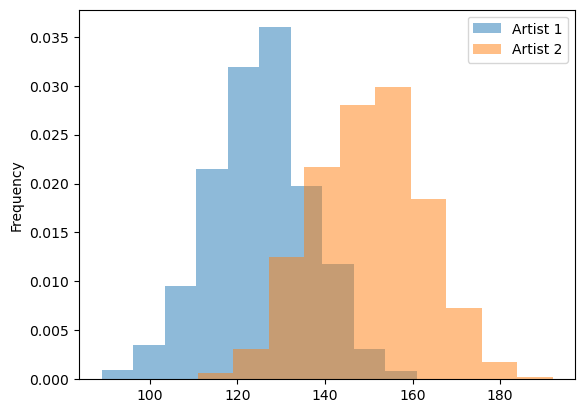

In [84]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: It collapses all mixed whitespace into a single split point.


In [85]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

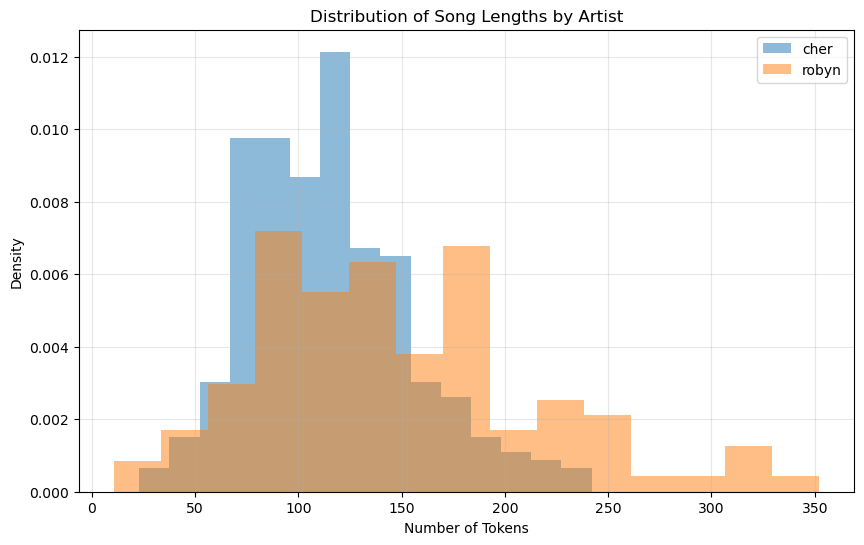

Song Length Statistics by Artist:
        count        mean        std   min    25%    50%     75%    max
artist                                                                 
cher    316.0  114.658228  39.828326  23.0  86.00  111.0  138.00  242.0
robyn   104.0  147.413462  67.615649  11.0  97.75  138.0  182.25  352.0


In [86]:
# Your lyric length comparison chart here. 
# Your lyric length comparison chart here
import matplotlib.pyplot as plt

# Create a dataframe with song lengths for each artist
song_lengths = []

for artist, songs in clean_lyrics_data.items():
    for song_title, tokens in songs.items():
        song_lengths.append({
            'artist': artist,
            'song': song_title,
            'length': len(tokens)
        })

# Convert to DataFrame
song_length_df = pd.DataFrame(song_lengths)

# Create histogram of song lengths by artist
plt.figure(figsize=(10, 6))
song_length_df.groupby('artist')['length'].plot(
    kind="hist", 
    density=True, 
    alpha=0.5, 
    legend=True, 
    bins=15
)

plt.title('Distribution of Song Lengths by Artist')
plt.xlabel('Number of Tokens')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.show()

# Print some summary statistics
print("Song Length Statistics by Artist:")
print(song_length_df.groupby('artist')['length'].describe())